<a href="https://colab.research.google.com/github/EshaRana17/Conjunctivitis/blob/main/binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

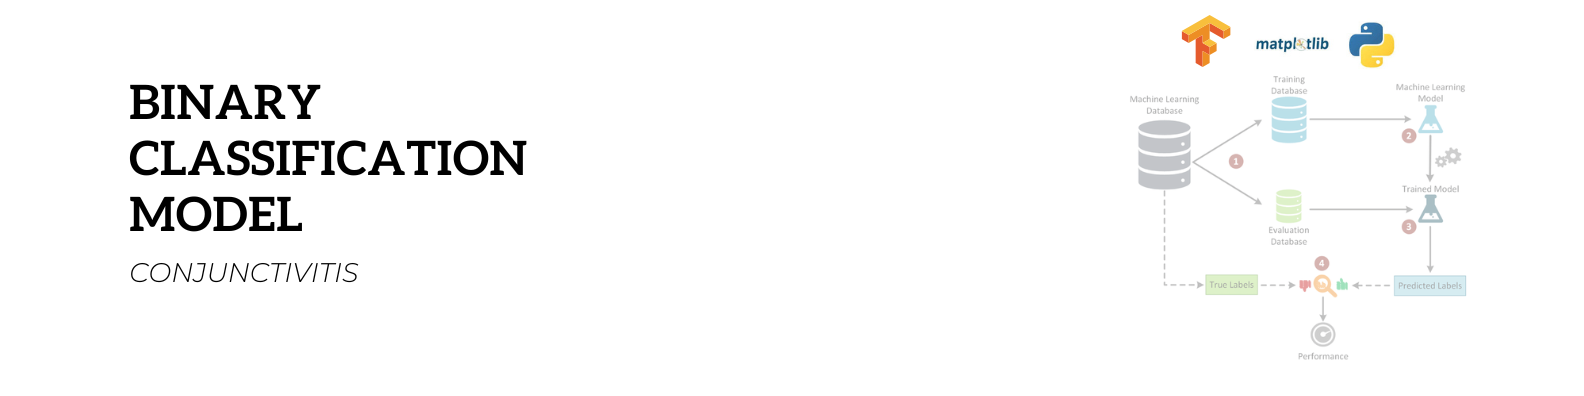

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg

# **Data Preparation**

## **1. Exploratory Data Analysis (EDA)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/binaryDataset'
classes = os.listdir(dataset_path)

print("Classes found:", classes)


Saving dataset.zip to dataset.zip


In [ ]:
class_counts = {}

for cls in classes:
    class_folder = os.path.join(dataset_path, cls)
    if os.path.isdir(class_folder):
        class_counts[cls] = len(os.listdir(class_folder))

print("Image count per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

Contents of the extraction directory:
['conjunctivitis', 'healthy eye']


In [ ]:
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.show()

The total number of images in the dataset is: 573


Category: conjunctivitis


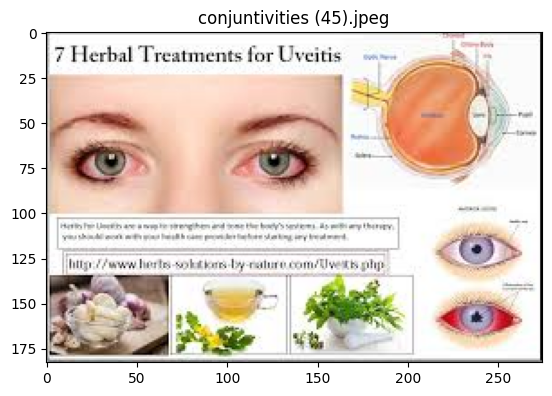

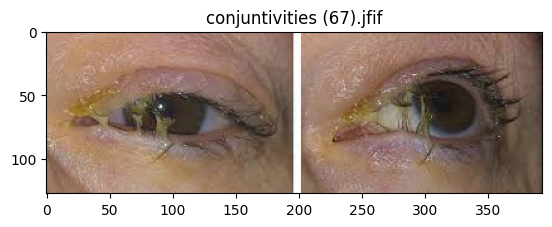

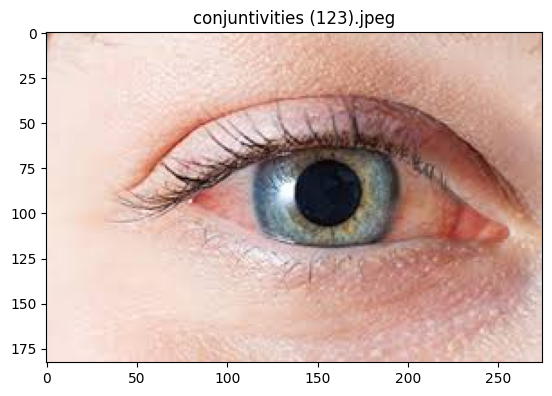

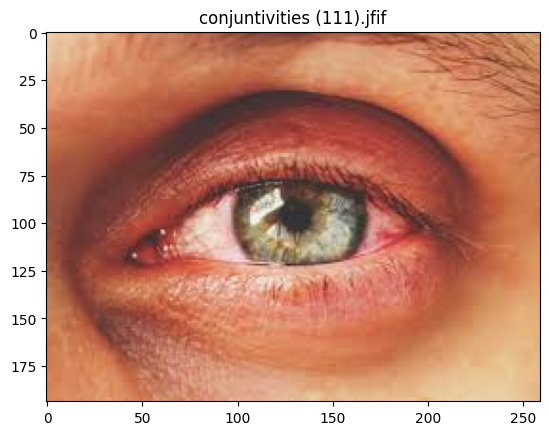

Category: healthy eye


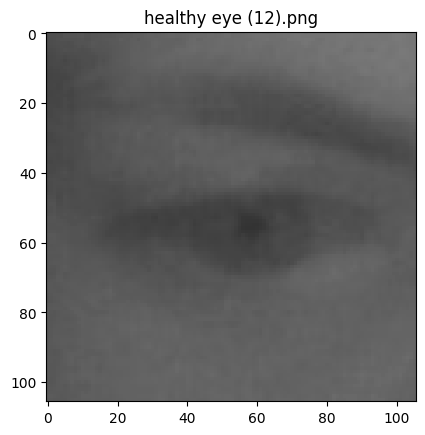

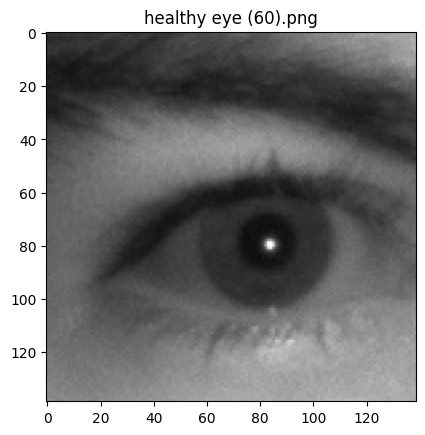

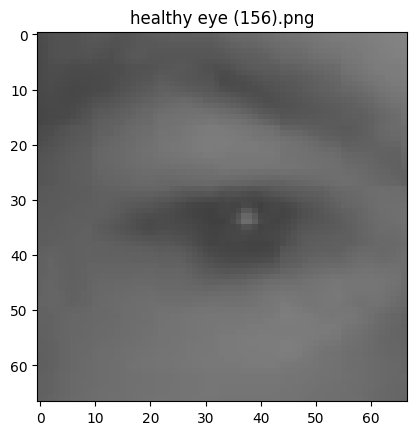

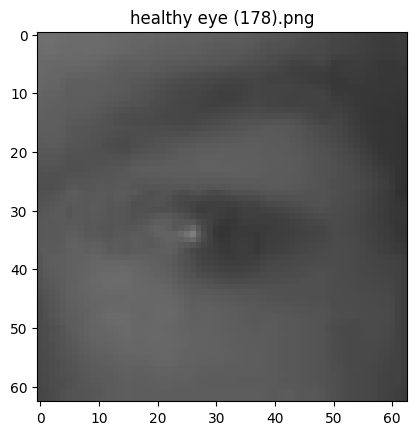

In [ ]:
print("Sample Images\n")

for idx, class_name in enumerate(classes, 1):
    class_path = os.path.join(dataset_path, class_name)
    valid_images = []
    for img_name in os.listdir(class_path):
        try:
            img_path = os.path.join(class_path, img_name)
            img = mpimg.imread(img_path)
            if img.ndim == 3 and np.mean(img) > 30:
                valid_images.append((img, img_name))
            if len(valid_images) == 5:
                break
        except:
            continue

    print(f"Class {idx}: {class_name}")
    plt.figure(figsize=(10,3))
    for i, (img, name) in enumerate(valid_images):
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

In [ ]:
from PIL import Image
import numpy as np
import os

shapes = []

for cls in classes:
    img_name = os.listdir(os.path.join(dataset_path, cls))[0]
    img = Image.open(os.path.join(dataset_path, cls, img_name))
    shapes.append(np.array(img).shape)

for cls, shape in zip(classes, shapes):
    print(f"{cls}: {shape}")

In [ ]:
import os
import cv2

dataset_path = '/content/drive/My Drive/binaryDataset'
new_size = (224, 224)

for cls in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, cls)
    if not os.path.isdir(class_path):
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Skipped: {img_name}")
            continue

        resized = cv2.resize(img, new_size)
        # Overwrite original file (convert to .jpg if needed)
        save_path = os.path.splitext(img_path)[0] + '.jpg'
        cv2.imwrite(save_path, resized)

print("✅ All images resized and saved in the same directory.")

In [ ]:
for cls in classes:
    sizes = [img.shape for img, label in zip(resized_images, labels) if label == cls]
    print(f"{cls}: {len(sizes)} images, All size: {sizes[0]}")

In [ ]:
import os
import cv2
import numpy as np

dataset_path = '/content/drive/My Drive/binaryDataset'

# Lists to store images and labels
X = []
Y = []

# Size to which you want to resize the images
new_size = (224, 224)

# Loop through each category
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    # Check if it's a directory
    if os.path.isdir(category_path):
        print(f"Processing images in category: {category}")

        # Loop through each image in the category
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)

            # Read and resize the image
            img = cv2.imread(image_path)
            resized_img = cv2.resize(img, new_size)

            # Append the resized image to the X list
            X.append(resized_img)

            # Append the label to the Y list (you can use the category as a label)
            Y.append(category)

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

print("Processing completed.")

In [ ]:
# Print unique labels in Y
print("Unique labels in Y:", np.unique(Y))

# Print some information about X
print("Number of images:", len(X))
print("Sample image shape:", X.shape[1:])  # Shape of a single image
print("Sample label:", Y[0])  # Label of the first image


Unique labels in Y: ['conjunctivitis' 'healthy eye']
Number of images: 573
Sample image shape: (224, 224, 3)
Sample label: conjunctivitis


## **1.2 Dataset Spliting**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and Y are your image data and labels
# Use train_test_split to split the data
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Further split the temporary data into validation and test sets
# Adjust the test_size parameter to achieve the desired split ratio
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=1/3, random_state=42)

# Print the shapes of the resulting sets
print("Training set shapes:", X_train.shape, Y_train.shape)
print("Validation set shapes:", X_val.shape, Y_val.shape)
print("Testing set shapes:", X_test.shape, Y_test.shape)




Training set shapes: (401, 224, 224, 3) (401,)
Validation set shapes: (114, 224, 224, 3) (114,)
Testing set shapes: (58, 224, 224, 3) (58,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)

# Convert labels to one-hot encoded format
Y_train_one_hot = to_categorical(Y_train_encoded, num_classes=2)
Y_val_one_hot = to_categorical(Y_val_encoded, num_classes=2)
Y_test_one_hot = to_categorical(Y_test_encoded, num_classes=2)

# Convert image lists to NumPy arrays
X_train_array = np.array(X_train)
X_val_array = np.array(X_val)
X_test_array = np.array(X_test)

# Print the shapes of the arrays
print("Training set shapes:", X_train_array.shape, Y_train_one_hot.shape)
print("Validation set shapes:", X_val_array.shape, Y_val_one_hot.shape)
print("Testing set shapes:", X_test_array.shape, Y_test_one_hot.shape)


Training set shapes: (401, 224, 224, 3) (401, 2)
Validation set shapes: (114, 224, 224, 3) (114, 2)
Testing set shapes: (58, 224, 224, 3) (58, 2)


## **1.3 Label Encoding**

In [ ]:
# Print the encoded labels
print("Encoded labels for training set:", Y_train_encoded)
print("Encoded labels for validation set:", Y_val_encoded)
print("Encoded labels for testing set:", Y_test_encoded)

Encoded labels for training set: [0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0
 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1
 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0]
Encoded labels for validation set: [1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 

# **2. Model Training**

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras import backend as K
import numpy as np

# Assuming you have loaded the VGG16 model into base_model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Get the first 13 layers from the VGG16 model
num_layers_to_keep = 13
vgg16_model = Model(inputs=base_model.input, outputs=base_model.layers[num_layers_to_keep].output)

# Adjust dense layer sizes
output = vgg16_model.output
output = GlobalAveragePooling2D()(output)
output = Dense(512, activation='relu')(output)
output = Dropout(0.7)(output)  # Add dropout layer
output = Dense(256, activation='relu')(output)
output = Dropout(0.5)(output)  # Add another dropout layer

# Output layer for classification
output = Dense(2, activation='softmax')(output)

# Create a new model with the modified base and custom layers
model = Model(inputs=vgg16_model.input, outputs=output)

# Implement learning rate schedule
def lr_schedule(epoch):
    initial_lr = 0.0001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * K.exp(-0.1 * (epoch - 10))  # Adjust the learning rate decay

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Assuming you have 'Y_train', 'Y_val' as your original labels
class_weights = np.ones(len(Y_train))  # Initialize with equal weights
unique_labels, counts = np.unique(Y_train, return_counts=True)
label_to_index = {label: i for i, label in enumerate(unique_labels)}

for label, count in zip(unique_labels, counts):
    class_weights[label_to_index[label]] = len(Y_train) / (2.0 * count)

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Print the summary of the new model
model.summary()

# Train the model with class weights and callbacks
history = model.fit(X_train, Y_train_one_hot, epochs=20, validation_data=(X_val, Y_val_one_hot),
          class_weight=class_weights_dict, callbacks=[lr_scheduler, early_stopping])


58889256/58889256 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
model.save("/content/drive/MyDrive/EyeSpy_Model/Binary_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **3. Model Training Results**

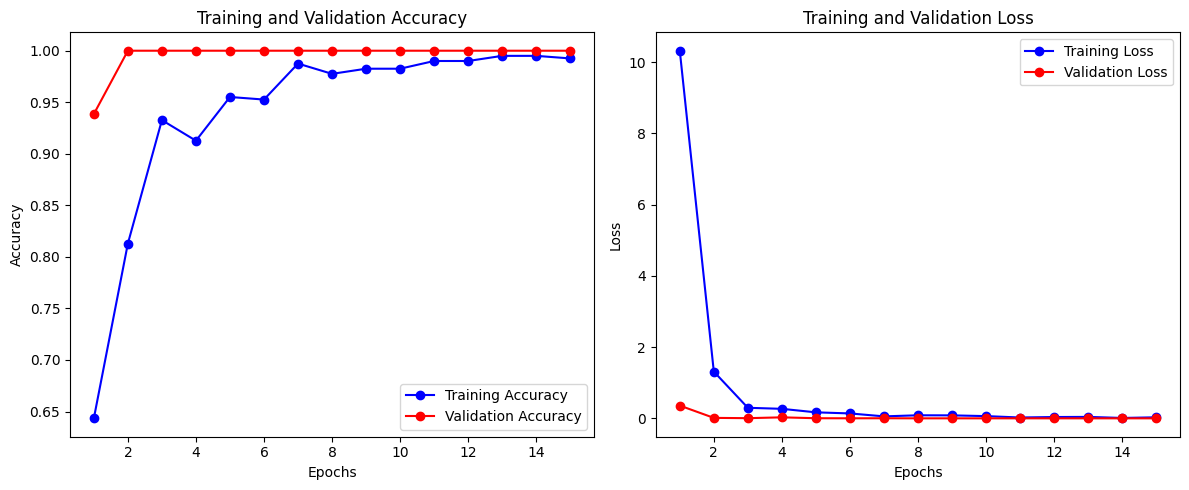

In [ ]:
import matplotlib.pyplot as plt

# Access the accuracy and loss values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation accuracy
epochs = range(1, len(training_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
results = model.evaluate(X_test, Y_test_one_hot)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

2/2 [==============================] - 3s 3s/step - loss: 0.0169 - accuracy: 1.0000
Test Loss: 0.016945596784353256
Test Accuracy: 1.0


In [ ]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_val_array)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

4/4 [==============================] - 1s 119ms/step


# **4. Model Testing and Evaluation on Test Set**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Assuming you have 'Y_test' as your test labels
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test_one_hot, axis=1)

# Calculate metrics
accuracy = accuracy_score(Y_test_classes, Y_pred_classes)
precision = precision_score(Y_test_classes, Y_pred_classes, average='weighted')
recall = recall_score(Y_test_classes, Y_pred_classes, average='weighted')
f1 = f1_score(Y_test_classes, Y_pred_classes, average='weighted')

# Print metrics
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

# Print confusion matrix
conf_matrix = confusion_matrix(Y_test_classes, Y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Count the number of images in each class
class_counts = np.bincount(Y_test_classes)
print("Class Counts:")
for class_idx, count in enumerate(class_counts):
    print(f"Class {class_idx}: {count} images")


2/2 [==============================] - 0s 138ms/step
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0
Confusion Matrix:
[[41  0]
 [ 0 17]]
Class Counts:
Class 0: 41 images
Class 1: 17 images


2/2 [==============================] - 0s 155ms/step


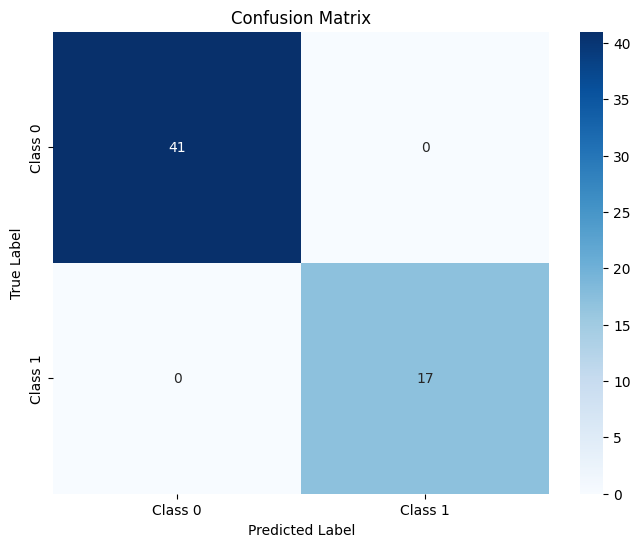

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have 'Y_test' as your test labels
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test_one_hot, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test_classes, Y_pred_classes)

# Count the number of images in each class
class_counts = np.bincount(Y_test_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()


In [ ]:
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

# Assuming you have 'Y_test' as your true labels
Y_test_classes = np.argmax(Y_test_one_hot, axis=1)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(Y_test_classes, Y_pred_classes)
print("Matthews Correlation Coefficient (MCC):", mcc)

# Calculate Cohen Kappa
kappa = cohen_kappa_score(Y_test_classes, Y_pred_classes)
print("Cohen Kappa:", kappa)

# Interpret Cohen Kappa
if kappa == 0:
    interpretation = "Poor agreement"
elif 0 < kappa <= 0.20:
    interpretation = "Weak agreement"
elif 0.20 < kappa <= 0.40:
    interpretation = "Fair agreement"
elif 0.40 < kappa <= 0.60:
    interpretation = "Moderate agreement"
elif 0.60 < kappa <= 0.80:
    interpretation = "Substantial agreement"
else:
    interpretation = "Almost perfect agreement"

print("Interpretation of Cohen Kappa:", interpretation)


Matthews Correlation Coefficient (MCC): 1.0
Cohen Kappa: 1.0
Interpretation of Cohen Kappa: Almost perfect agreement


# **5. Gradio App development**